In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
data=np.loadtxt('19data.txt',skiprows=1)
A=np.array([np.ones(len(data[:,0])),data[:,0]]).T
b=data[:,1]
a=np.linalg.solve(A.T.dot(A),A.T.dot(b))
print(a)

[32.00396939  2.191028  ]


$x_i$

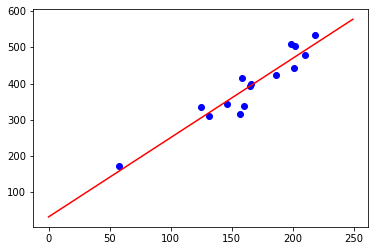

In [4]:
plt.figure()
x=np.arange(0,250,1)
plt.scatter(data[:,0],data[:,1],c='b')
plt.plot(x,a[1]*x+a[0],c='r')
plt.show()

25.138509715904377 2.2325362169534193


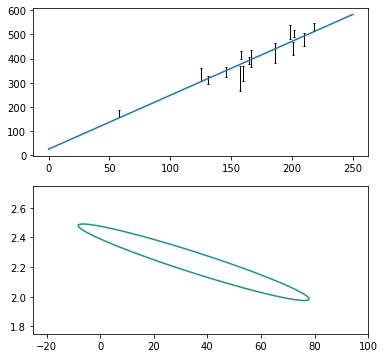

In [4]:
#卡方拟合
import matplotlib.pyplot as plt
import numpy as np
import math as m

def f(x, y):
    return tn * x ** 2 + tx2 * y ** 2 - 2 * yt * x - 2 * xyt * y + 2 * xt * x * y + ty2 - 2 * (km + 1)
n = 15#共15个数据
x = np.loadtxt('19data.txt', dtype = float, skiprows = 1, usecols = 0)#读入数据
y = np.loadtxt('19data.txt', dtype = float, skiprows = 1, usecols = 1)
dy = np.loadtxt('19data.txt', dtype = float, skiprows = 1, usecols = 2)
t = []
tn = 0.#t的求和
xn = 0.#x的求和
yn = 0.#y的求和
yt = 0.#y * t的求和
xt = 0.#x * t的求和
for i in range(n):
    t.append(1. / dy[i] ** 2)
    tn = tn + t[i]
    yt = yt + y[i] * t[i]
    xt = xt + x[i] * t[i]
    xn = xn + x[i]
    yn = yn + y[i]
b1 = 0.#b的分子
b2 = 0.#b的分母
for i in range(n):
    b1 = b1 + (x[i] * y[i] * tn - x[i] * yt) * t[i]
    b2 = b2 + x[i] ** 2 * t[i] * tn - x[i] * t[i] * xt
b = b1 / b2
a = yn / n - b * xn / n
print(a, b)
km = 0#卡方最小值
tx2 = 0
ty2 = 0#t * y ** 2求和
xyt = 0
for i in range(n):
    km = km + 0.5 * ((y[i] - a - b * x[i]) / dy[i]) ** 2
    tx2 = tx2 + t[i] * x[i] **2
    ty2 = ty2 + t[i] * y[i] **2
    xyt = xyt + x[i] * y[i] * t[i]

fig, ax = plt.subplots(2, figsize = (6, 6))
x0 = np.linspace(0, 250, 1000)
ax[0].errorbar(x, y, yerr = dy, color = "black", ecolor = 'black', linewidth = 0, elinewidth = 1, capsize = 1)#, fmt = "."
ax[0].plot(x0, a + b * x0)
#k = km + 1
#等高线法隐函数作图
N = 500
a1 = np.linspace(-25, 100, N)
b1 = np.linspace(1.75, 2.75, N)
X,Y = np.meshgrid(a1, b1)#构造网格
ax[1].contour(X, Y, f(X,Y),0)#绘制等高线
plt.show()
